In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Dict, Tuple


In [2]:
df = pd.read_csv('../../Datasets/Final Datasets/model_dataset.csv')
df.head()

,O*NET-SOC Code,Title,Attribute Type,Element ID,Element Name,Scale Name,Data Value
0,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Importance,4.78
1,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Level,6.50
2,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Importance,2.42
3,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Level,2.69
4,11-1011.00,Chief Executives,Knowledge,2.C.1.c,Economics and Accounting,Importance,4.04


In [3]:

df.info()

df.describe()

df.isnull().sum()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391425 entries, 0 to 391424
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   O*NET-SOC Code  391425 non-null  object 
 1   Title           391425 non-null  object 
 2   Attribute Type  391425 non-null  object 
 3   Element ID      391425 non-null  object 
 4   Element Name    391425 non-null  object 
 5   Scale Name      391425 non-null  object 
 6   Data Value      391425 non-null  float64
dtypes: float64(1), object(6)
memory usage: 20.9+ MB


Index(['O*NET-SOC Code', 'Title', 'Attribute Type', 'Element ID',
       'Element Name', 'Scale Name', 'Data Value'],
      dtype='object')

In [4]:
df['Attribute Type'].unique()

array(['Knowledge', 'Skill', 'Ability', 'Education', 'Experience',
       'Training', 'Interest', 'Work Values', 'Work Styles',
       'Work Activity', 'Work Context'], dtype=object)

## Input Issue

The issue is that we have over 390,000 samples. Meaning if we want user to give inputs to get recommendations, they need to give inputs for over 390,000 features. This is not feasible and user-friendly. Some technical solutions to this problem are:

1. Use dimensionality reduction techniques like PCA to reduce the number of features.
2. Use clustering techniques to group similar samples together.

But the thing is for dimensionality reduction (PCA) approach is that we create new features based on the relevancy of variance. But we only have 7 features and we need to use all of them. Issue is the number of inputs needed under each 'Attribute Type'. For example, for our first attribute type 'Knowledge' alone, there are multiple elements required to be inputted like 'Administration and Management', 'Administrative', 'Economics and Accounting', etc.

So we need to find a way to reduce the number of inputs needed from the user while still maintaining the relevance of the features. So a more user-friendly approach would be to use clustering techniques.

## Wide + PCA

Ok so I might have cooked another approach. Our current dataset is in a long format. What if we convert it into a wide format, where each column is the different attribute types and their elements. And then we can use PCA to reduce the number of features to get the most relevant features for a recommendation.

## Hierarchical Clustering Approach:

**Advantages:**
- Maintains intpretability of attributes.
- Can cluster similar elements together within each attribute type.
- More intuitive for users to understand.

**Disadvantages:**
- Doesn't reduce input complexity as effectively.
- Still requires user to input a lot of features.
- May lose granularity in recommendations.

## Wide Format + PCA Approach:

**Advantages:**
- Could significantly reduce input dimensionality.
- Might capture hidden patterns between attributes.
- Would require fewer inputs from the user.

**Disadvantages:**
- Loss of interpretability
- Difficult to explain recommendations
- Complex transformation needed
- Hard to maintain separate scales for importance and level for each attribute type

## Hybrid Approach:

1. Transform Data Structure

```python
df_wide = pd.pivot(df, 
    index='Title',
    columns=['Attribute Type', 'Element Name', 'Scale Name'],
    values='Data Value')
```
2. Apply hierarchical clustering within attribute types
    - Cluster similar elements with Knowledge, Skills, etc.
    - Create super-categories for user input
    - Maintain interpretability while reducing input complexity
3. Progressive Input System
    - Start with cluster-level inputs
    - Allow drilling down for high-interest areas
    - Use default value for low-interest areas

I think this hybrid approach is the best way to go. It maintains interpretability while reducing the number of inputs needed from the user.

In [5]:
# Step 1: Wide Format Transformation
df_wide = pd.pivot(df,
            index='Title',
            columns=['Attribute Type', 'Element Name', 'Scale Name'],
            values='Data Value')
df_wide.head()

Attribute Type                               Knowledge                       \
Element Name             Administration and Management       Administrative   
Scale Name                                  Importance Level     Importance   
Title                                                                         
Accountants and Auditors                          3.53  4.08           3.07   
Actors                                            2.56  2.23           2.21   
Actuaries                                         2.89  4.04           1.82   
Acupuncturists                                    3.21  3.39           2.85   
Acute Care Nurses                                 2.89  2.96           2.68   

Attribute Type                                                 \
Element Name                   Economics and Accounting         
Scale Name               Level               Importance Level   
Title                                                           
Accountants and Auditors  4.51                     4.65  5.84   
Actors                    2.09                     1.70  1.15   
Actuaries                 2.64                     3.78  5.11   
Acupuncturists            3.83                     2.60  2.37   
Acute Care Nurses         3.11                     1.68  1.11   

Attribute Type                                      \
Element Name             Sales and Marketing         
Scale Name                        Importance Level   
Title                                                
Accountants and Auditors                1.98  2.13   
Actors                                  2.89  3.15   
Actuaries                               2.32  3.36   
Acupuncturists                          3.64  4.31   
Acute Care Nurses                       1.79  1.61   

Attribute Type                                                ...  \
Element Name             Customer and Personal Service        ...   
Scale Name                                  Importance Level  ...   
Title                                                         ...   
Accountants and Auditors                          3.51  4.42  ...   
Actors                                            3.08  2.98  ...   
Actuaries                                         2.25  2.89  ...   
Acupuncturists                                    4.15  5.17  ...   
Acute Care Nurses                                 4.36  5.61  ...   

Attribute Type                                                   Work Context  \
Element Name             Impact of Decisions on Co-workers or Company Results   
Scale Name                                                            Context   
Title                                                                           
Accountants and Auditors                                               4.33     
Actors                                                                 3.29     
Actuaries                                                              3.96     
Acupuncturists                                                         3.92     
Acute Care Nurses                                                      4.62     

Attribute Type                                         \
Element Name             Frequency of Decision Making   
Scale Name                                    Context   
Title                                                   
Accountants and Auditors                         3.97   
Actors                                           3.62   
Actuaries                                        3.08   
Acupuncturists                                   4.15   
Acute Care Nurses                                4.65   

Attribute Type                                                           \
Element Name             Freedom to Make Decisions Degree of Automation   
Scale Name                                 Context              Context   
Title                                                                     
Accountants and Auditors                      4.0

In [6]:
df_wide.isna().sum()

Attribute Type  Element Name                           Scale Name
Knowledge       Administration and Management          Importance    50
                                                       Level         50
                Administrative                         Importance    50
                                                       Level         50
                Economics and Accounting               Importance    50
                                                                     ..
Work Context    Importance of Repeating Same Tasks     Context       50
                Structured versus Unstructured Work    Context       50
                Level of Competition                   Context       50
                Time Pressure                          Context       50
                Pace Determined by Speed of Equipment  Context       50
Length: 449, dtype: int64

In [7]:
# Step 2: PCA on the wide format dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_wide_filled = pd.DataFrame(
    imputer.fit_transform(df_wide),
    columns=df_wide.columns,
    index=df_wide.index
)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_wide_filled)

# Apply PCA
pca = PCA(n_components=0.95) # Keep 95% of variance
pca_components = pca.fit_transform(scaled_data)


Processing Knowledge


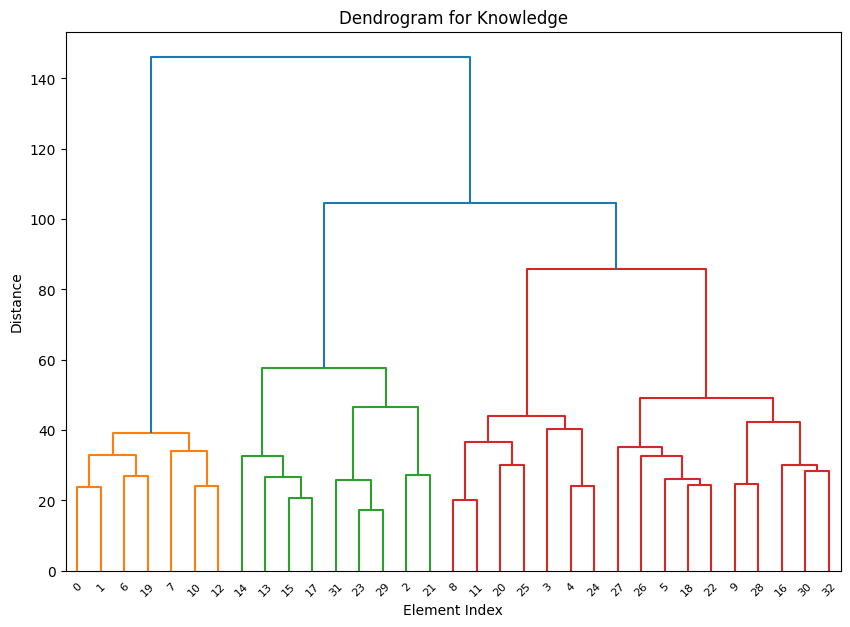


Cluster 1 for Knowledge:
['Administration and Management', 'Administrative', 'Computers and Electronics', 'Customer and Personal Service', 'Education and Training', 'English Language', 'Mathematics']

Cluster 2 for Knowledge:
['Fine Arts', 'Food Production', 'Foreign Language', 'History and Archeology']

Cluster 3 for Knowledge:
['Biology', 'Medicine and Dentistry', 'Philosophy and Theology', 'Sociology and Anthropology', 'Therapy and Counseling']

Cluster 4 for Knowledge:
['Building and Construction', 'Chemistry', 'Design', 'Engineering and Technology', 'Mechanical', 'Physics', 'Production and Processing']

Cluster 5 for Knowledge:
['Communications and Media', 'Economics and Accounting', 'Geography', 'Law and Government', 'Personnel and Human Resources', 'Psychology', 'Public Safety and Security', 'Sales and Marketing', 'Telecommunications', 'Transportation']

Processing Skill


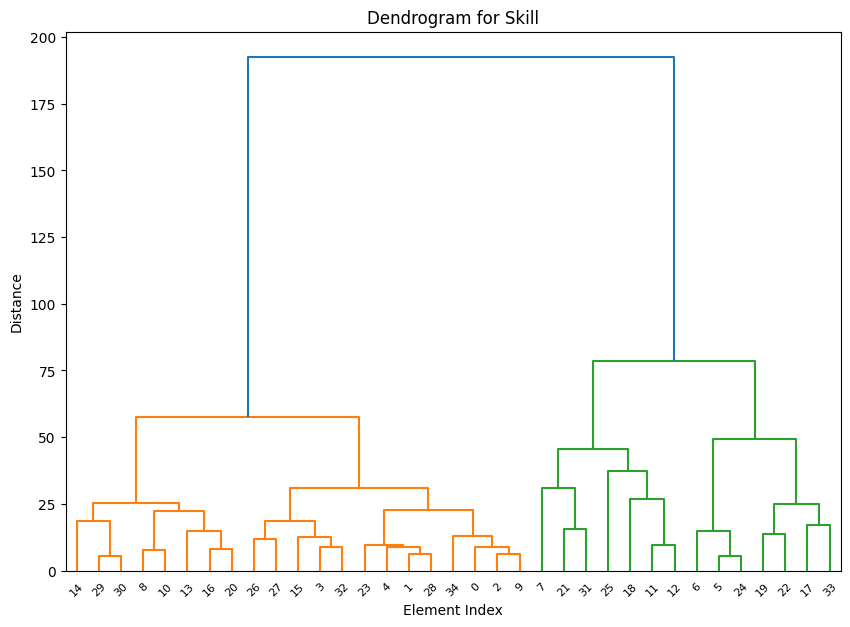


Cluster 1 for Skill:
['Instructing', 'Learning Strategies', 'Management of Personnel Resources', 'Mathematics', 'Negotiation', 'Persuasion', 'Systems Analysis', 'Systems Evaluation']

Cluster 2 for Skill:
['Active Learning', 'Active Listening', 'Complex Problem Solving', 'Coordination', 'Critical Thinking', 'Judgment and Decision Making', 'Monitoring', 'Reading Comprehension', 'Service Orientation', 'Social Perceptiveness', 'Speaking', 'Time Management', 'Writing']

Cluster 3 for Skill:
['Installation', 'Management of Financial Resources', 'Management of Material Resources', 'Operations Analysis', 'Programming', 'Science', 'Technology Design']

Cluster 4 for Skill:
['Equipment Maintenance', 'Equipment Selection', 'Repairing']

Cluster 5 for Skill:
['Operation and Control', 'Operations Monitoring', 'Quality Control Analysis', 'Troubleshooting']

Processing Ability


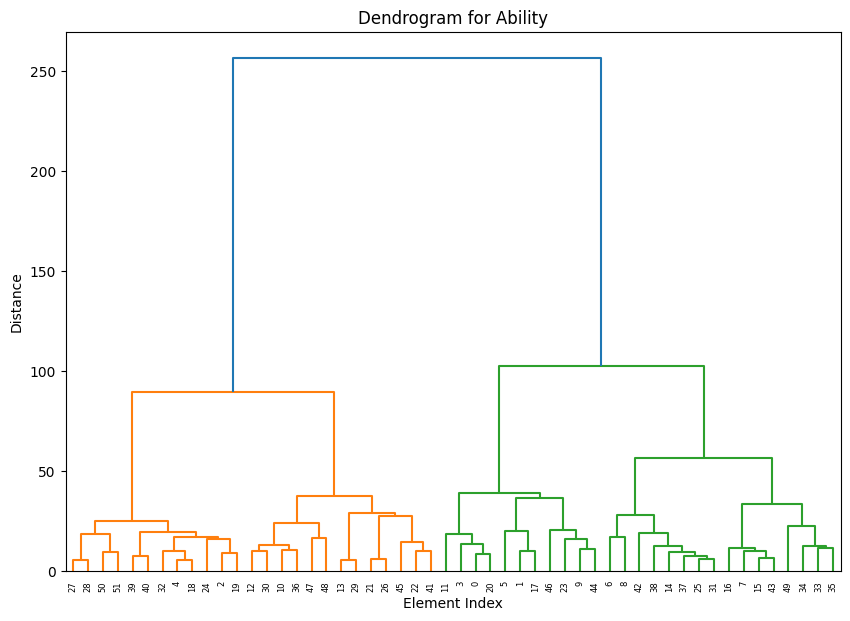


Cluster 1 for Ability:
['Category Flexibility', 'Deductive Reasoning', 'Inductive Reasoning', 'Information Ordering', 'Near Vision', 'Oral Comprehension', 'Oral Expression', 'Problem Sensitivity', 'Speech Clarity', 'Speech Recognition', 'Written Comprehension', 'Written Expression']

Cluster 2 for Ability:
['Far Vision', 'Flexibility of Closure', 'Fluency of Ideas', 'Mathematical Reasoning', 'Memorization', 'Number Facility', 'Originality', 'Perceptual Speed', 'Selective Attention', 'Speed of Closure', 'Time Sharing', 'Visual Color Discrimination', 'Visualization']

Cluster 3 for Ability:
['Arm-Hand Steadiness', 'Auditory Attention', 'Control Precision', 'Depth Perception', 'Extent Flexibility', 'Finger Dexterity', 'Hearing Sensitivity', 'Manual Dexterity', 'Multilimb Coordination', 'Static Strength', 'Trunk Strength']

Cluster 4 for Ability:
['Dynamic Flexibility', 'Explosive Strength', 'Glare Sensitivity', 'Night Vision', 'Peripheral Vision', 'Sound Localization', 'Spatial Orientati

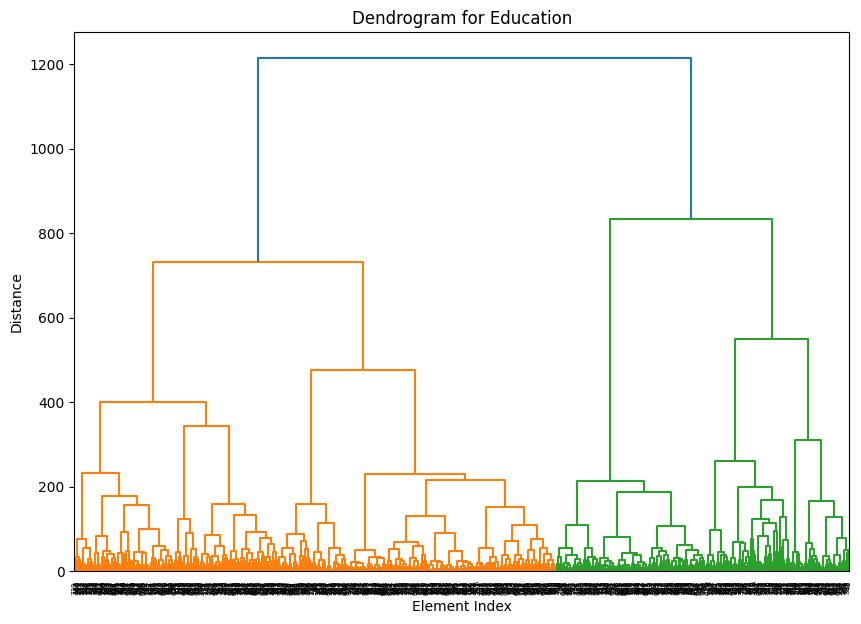


Cluster 1 for Education:
['Acute Care Nurses', 'Administrative Services Managers', 'Advertising Sales Agents', 'Aerospace Engineering and Operations Technologists and Technicians', 'Agents and Business Managers of Artists, Performers, and Athletes', 'Air Traffic Controllers', 'Aircraft Mechanics and Service Technicians', 'Airfield Operations Specialists', 'Audio and Video Technicians', 'Automotive Engineering Technicians', 'Automotive Service Technicians and Mechanics', 'Aviation Inspectors', 'Avionics Technicians', 'Bailiffs', 'Billing and Posting Clerks', 'Biofuels Production Managers', 'Biomass Plant Technicians', 'Bookkeeping, Accounting, and Auditing Clerks', 'Broadcast Technicians', 'Brokerage Clerks', 'Bus and Truck Mechanics and Diesel Engine Specialists', 'Camera Operators, Television, Video, and Film', 'Camera and Photographic Equipment Repairers', 'Captains, Mates, and Pilots of Water Vessels', 'Cardiovascular Technologists and Technicians', 'Career/Technical Education Teac

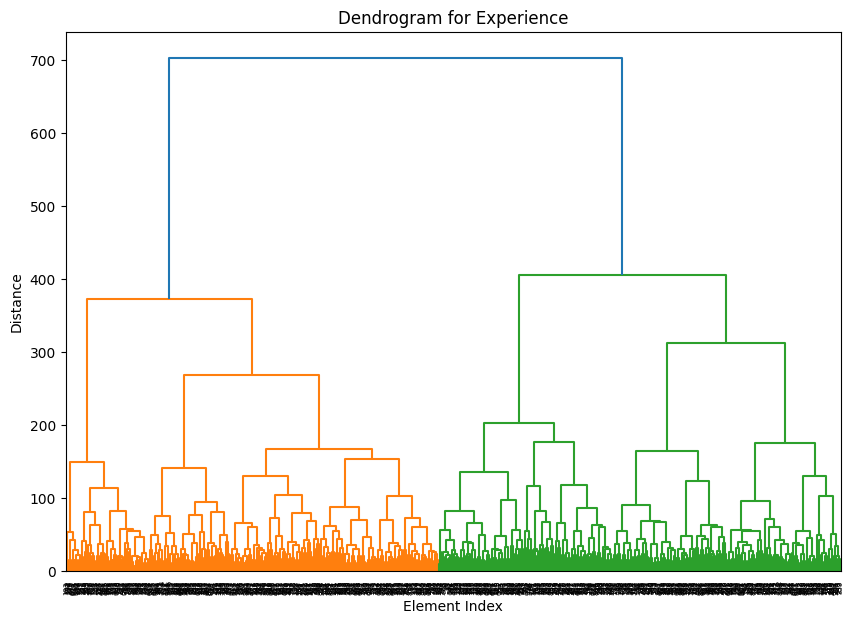


Cluster 1 for Experience:
['Actors', 'Actuaries', 'Acute Care Nurses', 'Ambulance Drivers and Attendants, Except Emergency Medical Technicians', 'Amusement and Recreation Attendants', 'Anesthesiologist Assistants', 'Automotive Body and Related Repairers', 'Automotive and Watercraft Service Attendants', 'Barbers', 'Baristas', 'Cargo and Freight Agents', 'Cashiers', 'Cleaning, Washing, and Metal Pickling Equipment Operators and Tenders', 'Coil Winders, Tapers, and Finishers', 'Construction Laborers', 'Conveyor Operators and Tenders', 'Cooks, Fast Food', 'Cooks, Short Order', 'Correctional Officers and Jailers', 'Crossing Guards and Flaggers', 'Cutting and Slicing Machine Setters, Operators, and Tenders', 'Demonstrators and Product Promoters', 'Dental Hygienists', 'Dining Room and Cafeteria Attendants and Bartender Helpers', 'Dishwashers', 'Door-to-Door Sales Workers, News and Street Vendors, and Related Workers', 'Driver/Sales Workers', 'Electrical and Electronic Equipment Assemblers', 

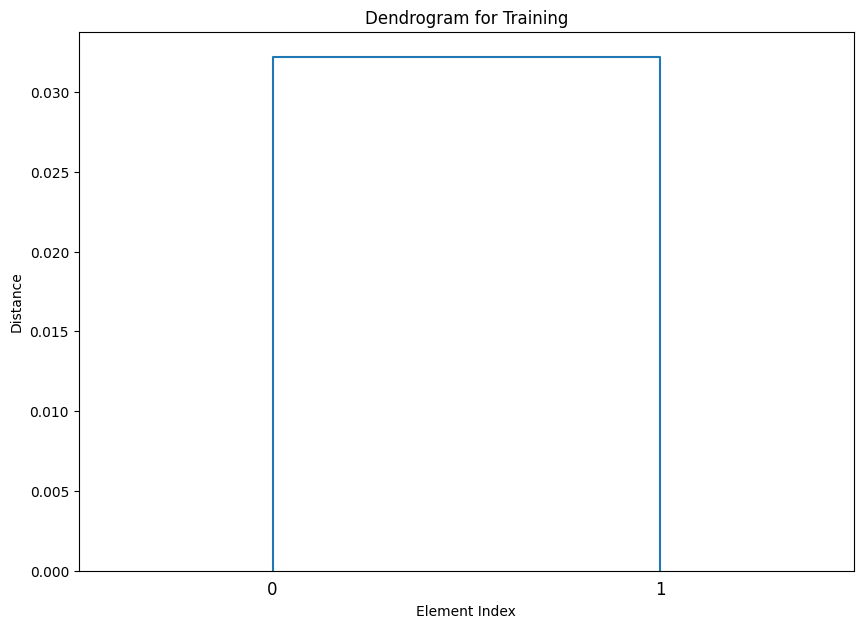


Cluster 1 for Training:
['On-Site or In-Plant Training']

Cluster 2 for Training:
['On-the-Job Training']

Cluster 3 for Training:
[]

Cluster 4 for Training:
[]

Cluster 5 for Training:
[]

Processing Interest


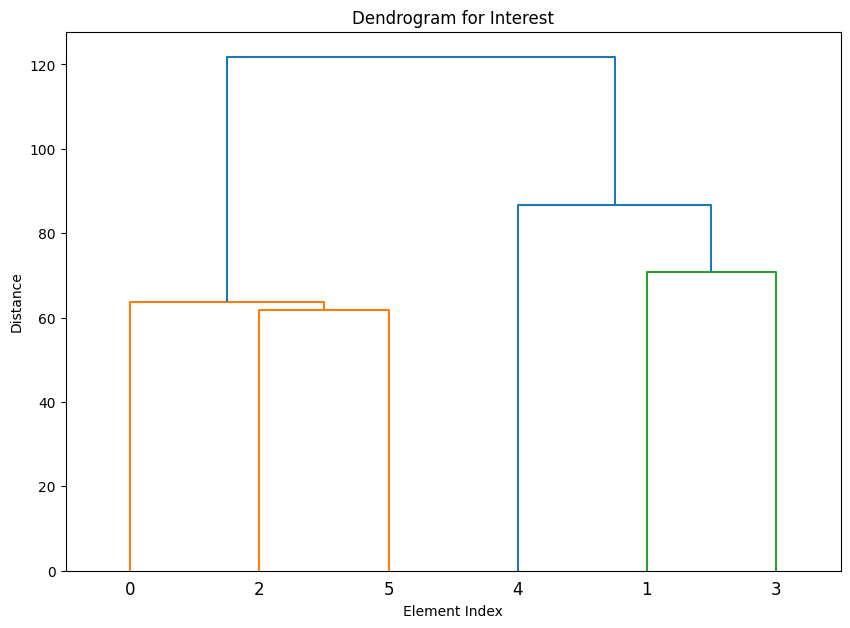


Cluster 1 for Interest:
['Artistic', 'Enterprising', 'Social']

Cluster 2 for Interest:
['Conventional']

Cluster 3 for Interest:
['Investigative']

Cluster 4 for Interest:
['Realistic']

Cluster 5 for Interest:
[]

Processing Work Values


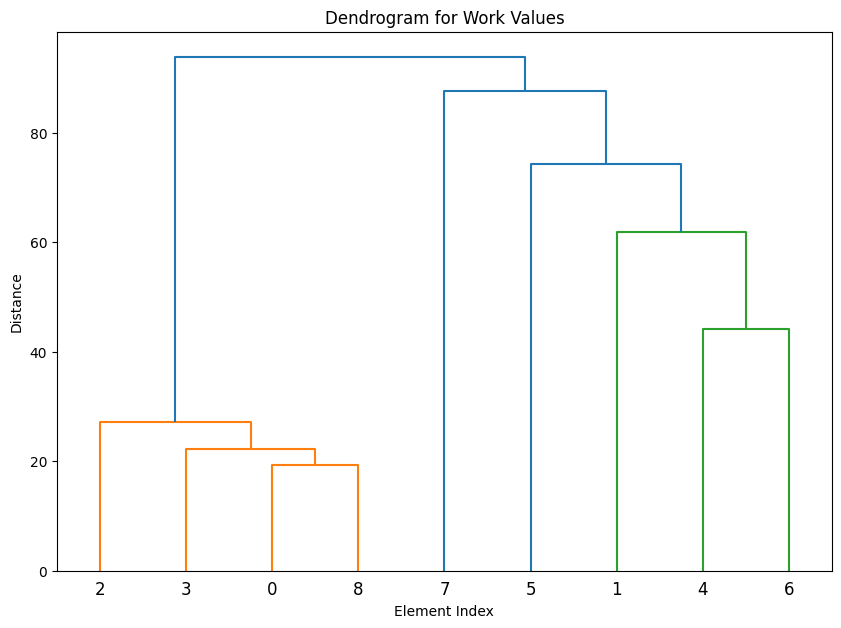


Cluster 1 for Work Values:
['Achievement', 'Independence', 'Recognition', 'Working Conditions']

Cluster 2 for Work Values:
['Relationships', 'Support']

Cluster 3 for Work Values:
['First Work Value High-Point']

Cluster 4 for Work Values:
['Second Work Value High-Point']

Cluster 5 for Work Values:
['Third Work Value High-Point']

Processing Work Styles


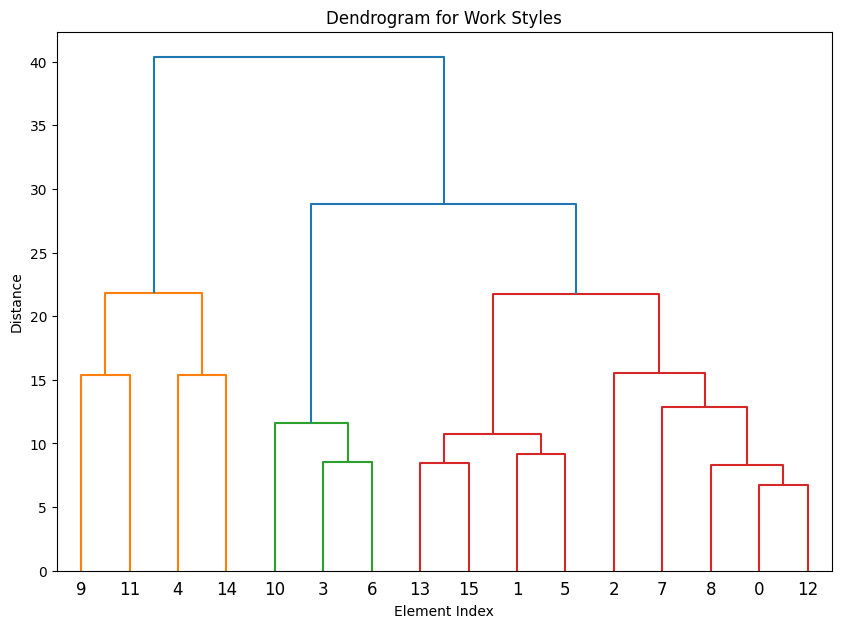


Cluster 1 for Work Styles:
['Innovation', 'Leadership']

Cluster 2 for Work Styles:
['Concern for Others', 'Social Orientation']

Cluster 3 for Work Styles:
['Attention to Detail', 'Dependability', 'Integrity']

Cluster 4 for Work Styles:
['Adaptability/Flexibility', 'Cooperation', 'Self-Control', 'Stress Tolerance']

Cluster 5 for Work Styles:
['Achievement/Effort', 'Analytical Thinking', 'Independence', 'Initiative', 'Persistence']

Processing Work Activity


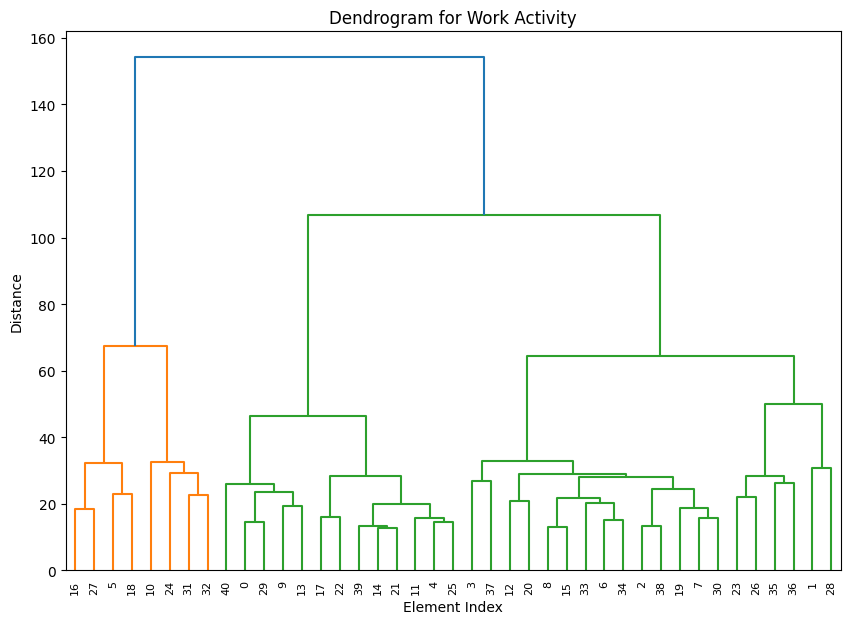


Cluster 1 for Work Activity:
['Controlling Machines and Processes', 'Handling and Moving Objects', 'Inspecting Equipment, Structures, or Materials', 'Performing General Physical Activities']

Cluster 2 for Work Activity:
['Drafting, Laying Out, and Specifying Technical Devices, Parts, and Equipment', 'Operating Vehicles, Mechanized Devices, or Equipment', 'Repairing and Maintaining Electronic Equipment', 'Repairing and Maintaining Mechanical Equipment']

Cluster 3 for Work Activity:
['Analyzing Data or Information', 'Communicating with Supervisors, Peers, or Subordinates', 'Documenting/Recording Information', 'Establishing and Maintaining Interpersonal Relationships', 'Evaluating Information to Determine Compliance with Standards', 'Getting Information', 'Identifying Objects, Actions, and Events', 'Making Decisions and Solving Problems', 'Monitoring Processes, Materials, or Surroundings', 'Organizing, Planning, and Prioritizing Work', 'Processing Information', 'Updating and Using Rele

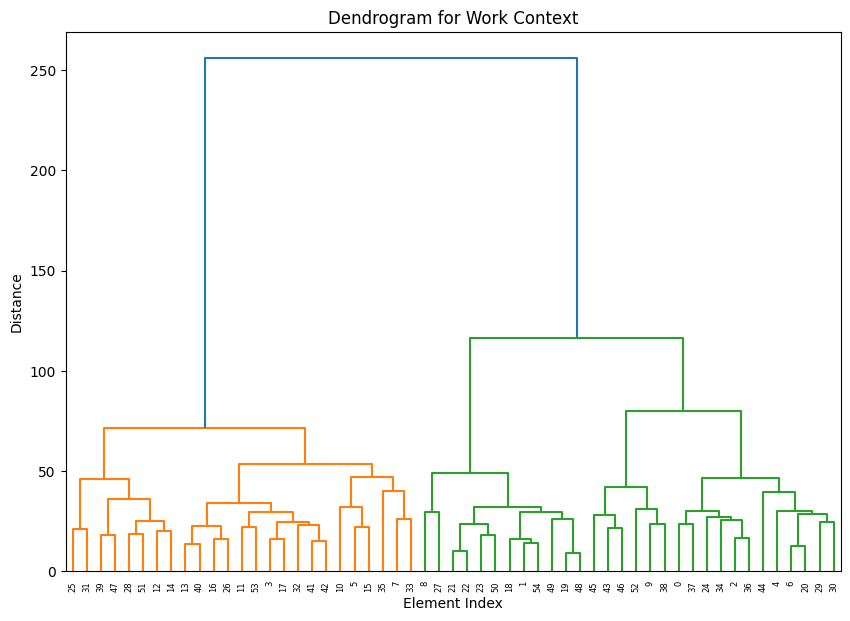


Cluster 1 for Work Context:
['Exposed to Hazardous Equipment', 'Exposed to Minor Burns, Cuts, Bites, or Stings', 'In an Enclosed Vehicle or Equipment', 'Indoors, Not Environmentally Controlled', 'Outdoors, Exposed to Weather', 'Spend Time Bending or Twisting the Body', 'Spend Time Walking and Running', 'Very Hot or Cold Temperatures']

Cluster 2 for Work Context:
['Cramped Work Space, Awkward Positions', 'Deal With Physically Aggressive People', 'Degree of Automation', 'Exposed to Disease or Infections', 'Exposed to Hazardous Conditions', 'Exposed to High Places', 'Exposed to Radiation', 'Exposed to Whole Body Vibration', 'Extremely Bright or Inadequate Lighting', 'In an Open Vehicle or Equipment', 'Outdoors, Under Cover', 'Pace Determined by Speed of Equipment', 'Public Speaking', 'Spend Time Climbing Ladders, Scaffolds, or Poles', 'Spend Time Keeping or Regaining Balance', 'Spend Time Kneeling, Crouching, Stooping, or Crawling', 'Wear Specialized Protective or Safety Equipment such 

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Function to cluster attributes within each attribute type
def cluster_attributes(df, n_clusters=5):
    cluster_results = {}
    
    for attr_type in df['Attribute Type'].unique():
        print(f"\nProcessing {attr_type}")
        attr_data = df[df['Attribute Type'] == attr_type]
        
        # Special handling for Education and Experience
        if attr_type in ['Education', 'Experience']:
            # Pivot on Title and Scale Name (category levels)
            clustering_data = attr_data.pivot_table(
                index='Title',
                columns='Scale Name',  # This will give us the category levels
                values='Data Value',
                fill_value=0
            )
        else:
            # Original approach for other attributes
            clustering_data = attr_data.pivot_table(
                index='Element Name',
                columns='Title',
                values='Data Value',
                fill_value=0
            )
        
        # Check if we have enough data for clustering
        if clustering_data.shape[0] < 2:
            print(f"Insufficient data for clustering {attr_type}. Need at least 2 elements.")
            continue
            
        # Check if the matrix is empty
        if clustering_data.empty:
            print(f"Empty distance matrix for {attr_type}. Skipping.")
            continue
        
        # Perform hierarchical clustering
        Z = linkage(clustering_data, method='ward')
        
        # Adjust n_clusters if we have fewer elements than requested clusters
        actual_n_clusters = min(n_clusters, clustering_data.shape[0])
        
        clusters = fcluster(Z, actual_n_clusters, criterion='maxclust')
        
        cluster_results[attr_type] = {
            'data': clustering_data,
            'linkage': Z,
            'clusters': clusters
        }
        
        # Visualize dendrogram
        plt.figure(figsize=(10, 7))
        dendrogram(Z)
        plt.title(f'Dendrogram for {attr_type}')
        plt.xlabel('Element Index')
        plt.ylabel('Distance')
        plt.show()
        
        # Print cluster memberships
        for cluster_id in range(1, n_clusters + 1):
            elements = clustering_data.index[clusters == cluster_id]
            print(f"\nCluster {cluster_id} for {attr_type}:")
            print(elements.tolist())
    
    return cluster_results

# Use the function
cluster_results = cluster_attributes(df, n_clusters=5)

## Further things to implement into our hierarchial clustering model

1. Implement validation metrics to check the quality of clustering.
2. Find an optimal number of clusters for each attribute type.
3. Further fine-tuning options like:
    - Trying different linkage methods
    - Try different distance metrics
    - Implement cluster size constraints (IDK what this one is)
